In [1]:
import numpy as np

x1 = np.random.rand(10)
x2 = np.random.rand(10)
x3 = np.random.rand(10)

print(np.corrcoef([x1,x2,x3]))

[[ 1.          0.33184428  0.52552201]
 [ 0.33184428  1.         -0.0794738 ]
 [ 0.52552201 -0.0794738   1.        ]]


# Exercise 1

Find the relationship between the descriptors listed below and boiling point of a molecule.

(1) univariate analysis - correlation between each descriptor and boiling point

(2) bivariate analysis - correlation between a pair of descriptors

(3) Descriptor - boiling point scatter plot

(4) Heat map of Pearson corr. coeff. values

In [22]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.GraphDescriptors import BalabanJ, BertzCT, Chi0, Chi1
from rdkit.Chem.rdMolDescriptors import CalcTPSA

# We will cover pandas soon..
df = pd.read_csv('BP.csv')
list_smiles = list(df['canonical_smiles'])
list_BP = list(df['BP'])
list_molec = []
list_descriptors = []
list_Balaban = []
list_BertzCT = []
list_Chi0 = []
list_Chi1 = []

#Getting a list of mol objects
for molec in list_smiles:
    mol = Chem.MolFromSmiles(molec)
    list_molec.append(mol)
     

#Getting descriptors
for mol in list_molec:
    list_Balaban.append(BalabanJ(mol))
    list_BertzCT.append(BertzCT(mol))
    list_Chi0.append(Chi0(mol))
    list_Chi1.append(Chi1(mol))
    
x_and_y = [list_Balaban, list_BertzCT, list_Chi0, list_Chi1, list_BP]
corr_matrix = np.corrcoef(x_and_y)
print(corr_matrix)
    
#Univariate
print('Boiling Point vs. Balaban J: \n{}'.format(np.corrcoef([list_BP, list_Balaban])))
print('Boiling Point vs. Bertz CT: \n{}'.format(np.corrcoef([list_BP, list_BertzCT])))
print('Boiling Point vs. Chi 0: \n{}'.format(np.corrcoef([list_BP, list_Chi0])))
print('Boiling Point vs. Chi 1: \n{}'.format(np.corrcoef([list_BP, list_Chi1])))

#Bivariate
print('Balaban J vs. Bertz CT:')

[[1.         0.20752864 0.4444438  0.12411413 0.19977474]
 [0.20752864 1.         0.56386362 0.63988652 0.40589556]
 [0.4444438  0.56386362 1.         0.90375714 0.72187375]
 [0.12411413 0.63988652 0.90375714 1.         0.74827042]
 [0.19977474 0.40589556 0.72187375 0.74827042 1.        ]]
Boiling Point vs. Balaban J: 
[[1.         0.19977474]
 [0.19977474 1.        ]]
Boiling Point vs. Bertz CT: 
[[1.         0.40589556]
 [0.40589556 1.        ]]
Boiling Point vs. Chi 0: 
[[1.         0.72187375]
 [0.72187375 1.        ]]
Boiling Point vs. Chi 1: 
[[1.         0.74827042]
 [0.74827042 1.        ]]
Balaban J vs. Bertz CT:


# Matplotlib, seaborn examples

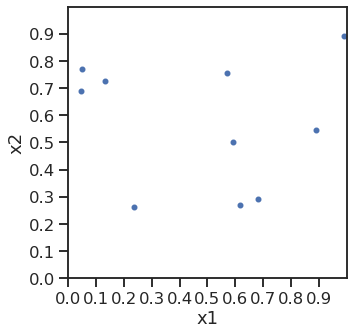

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})
%matplotlib inline

fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])
ax.set_xticks(np.arange(0.0,1.0,0.1))
ax.set_yticks(np.arange(0.0,1.0,0.1))

plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 20})

plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(np.random.rand(10),np.random.rand(10), s = 20)

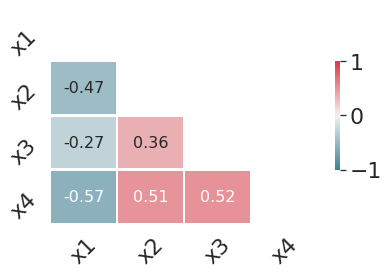

In [23]:
sns.set(style="white", font_scale=2)

x1 = np.random.rand(10)
x2 = np.random.rand(10)
x3 = np.random.rand(10)
x4 = np.random.rand(10)

# Compute the correlation matrix
corr = np.corrcoef([x1,x2,x3,x4])

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f',
            square=False, linewidths=1.5, cbar_kws={"shrink": .5}, annot_kws={"size": 16})
ax.set_xticklabels(['x1','x2','x3','x4'],rotation=45);
ax.set_yticklabels(['x1','x2','x3','x4'],rotation=45);

In [ ]:
sns.set(style="white", font_scale=1)

# Compute the correlation matrix
corr = [np.random.rand(10)]

f, ax = plt.subplots()
#f.set_size_inches(25.0, 10.0)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, cmap=cmap, vmin=-.5, vmax=.5, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2.0, cbar_kws={"shrink": .5}, annot_kws={"size": 12})
ax.set_xticklabels( range(0,10),rotation=45);
ax.set_yticklabels(['y'],rotation=45);

In [6]:
#cclib example
#https://cclib.github.io/data.html
import cclib

data = cclib.io.ccread('g16log_example1.log')
print(data.optdone, data.atomcoords[-1])
#vibfreqs, atomnos, enthalpy, freeenergy
#homos, moenergies


True [[ 5.635265e+00  7.618830e-01 -1.772760e-01]
 [ 4.270939e+00  6.916670e-01  5.135640e-01]
 [ 3.208127e+00 -2.928800e-02 -3.229250e-01]
 [ 1.842349e+00 -1.009570e-01  3.663690e-01]
 [ 7.931880e-01 -8.189140e-01 -4.717320e-01]
 [-4.249620e-01 -8.375020e-01  2.397990e-01]
 [-1.473827e+00 -1.481211e+00 -4.534280e-01]
 [-2.737511e+00 -1.419784e+00  3.988690e-01]
 [-3.227934e+00  2.645000e-03  7.093720e-01]
 [-3.771926e+00  7.708070e-01 -5.013210e-01]
 [-4.295804e+00  2.162009e+00 -1.333280e-01]
 [ 6.372018e+00  1.281442e+00  4.433900e-01]
 [ 5.568898e+00  1.295712e+00 -1.131977e+00]
 [ 6.024967e+00 -2.405230e-01 -3.873650e-01]
 [ 4.374618e+00  1.829770e-01  1.481033e+00]
 [ 3.922090e+00  1.707306e+00  7.422670e-01]
 [ 3.105004e+00  4.798040e-01 -1.291606e+00]
 [ 3.557998e+00 -1.045687e+00 -5.523600e-01]
 [ 1.478879e+00  9.098560e-01  5.890600e-01]
 [ 1.932682e+00 -6.181400e-01  1.329525e+00]
 [ 6.622880e-01 -3.089050e-01 -1.442712e+00]
 [ 1.120951e+00 -1.849564e+00 -6.961110e-01]
 [-1.

In [26]:
data = cclib.io.ccread('OH.log')
print(data.homos)
print(data.moenergies)
i1, i2 = data.homos
lumo_index1, lumo_index2 = i1+1, i2 + 1

[4 3]
[array([-522.52553297,  -27.36458515,  -12.64023258,  -10.96972566,
         -8.93621885,    2.03813274,   16.81854076,   21.72448137,
         22.51769324,   22.92477556,   24.01921747,   24.91229513,
         25.19719833,   25.23747118,   26.66960637,   51.08121202,
         66.99905593,   67.40586614,   77.22318963,  109.67793647,
        110.6961865 ,  110.71795561,  111.29783022,  123.67057489,
        135.22534532,  135.24684232,  135.58616829,  135.59487593,
        146.25139855,  147.62992731,  155.57728443,  172.54712049,
        340.29524111]), array([-521.86184729,  -25.44155657,  -11.94933552,   -8.24151219,
         -4.13096036,    2.27378333,   17.10344396,   23.14301087,
         23.23661804,   23.79254663,   25.0886249 ,   25.61434886,
         26.1515016 ,   26.26633365,   27.17519391,   51.28556952,
         67.23497864,   67.30572824,   77.49285446,  111.66654449,
        112.13294763,  113.02058301,  113.35664361,  124.46079351,
        136.52251205,  136.6569

# Exercise 2

Find the correlation between the difference of chemical hardness (HOMO-LUMO gap) between sugar and catalyst, and HMF yield. What's the value of Pearson correlation coefficient?

For unrestricted calculations, you will obtain two HOMO-LUMO gaps. Please use the larger one. (The larger one leads to smaller difference of chemical hardness with the sugar part)

In [27]:
import cclib
import glob

HMF_yield = {'Al': 68.0, 'Co2':35.0,'Cr':65.6,'Cu2':31.6,'Fe2':31.8,'Fe3': 25.5}

for logfile in sorted(glob.glob('./g16_logs/*catal*log')):
    data = cclib.io.ccread(logfile)
    
    
for logfile in sorted(glob.glob('./g16_logs/*sugar*log')):
    data = cclib.io.ccread(logfile)
    print(data)


# Assignment Week 6

(1) Find any (free) physical/chemical property database you're interested in.

(2) Generate descriptors, and do univariate, bivariate analysis. You can use your chemical intuition to downselect descriptors. Also, the descriptors do not need to be limited to those in RDKit.

If you have no clear idea about how to find the database and what database you're interested in, please reach out to me. I can share some files I have:)